In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import sys,os
import math
from tkinter import _flatten
from astropy.wcs import WCS
import warnings
from scipy import stats
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u

In [ ]:

path='/Users/baotong/data_GalDisc/data/result_GL/'
df1 = pd.read_csv(path+'pn_1000_300.csv')
# 读取第二个 CSV 文件
df2 = pd.read_csv(path+'pn_1000_300_new.csv')
# 合并两个 DataFrame，按行合并（默认是按行合并，即纵向合并）
merged_df = pd.concat([df1, df2], ignore_index=True)
# 将合并后的 DataFrame 保存到新的 CSV 文件
merged_df.to_csv(path+'pn_1000_300_tot.csv', index=False)

print("CSV 文件合并完成！")

CSV 文件合并完成！


In [ ]:
path='/Users/baotong/data_GalDisc/data/result_GL/'
res=pd.read_csv(path+'pn_1000_300.csv')
print(len(res))
Prob=res['p_period']
candindex=np.where(Prob>0.997)[0]
print(len(candindex))
cts=[];cts_100=[]
srcfilename=[];periodsrc=[]
path_data='/Users/baotong/data_GalDisc/data/srcevtfile/csv_all_obs/'
# for i in range(len(candindex)):
for i in range(len(Prob)):
    srcfile=pd.read_csv(path_data+res.iloc[i]['src_file'])
    cts.append(len(srcfile))
    # if len(srcfile)>100:
    #     cts_100.append(len(srcfile))
    #     srcfilename.append(res.iloc[candindex[i]]['src_file'])
    #     periodsrc.append(2*np.pi/res.iloc[candindex[i]]['w_peak'])
print(len(cts))

# plt.hist(Prob,bins,histtype='step')
# plt.loglog()
# plt.show()

12633
23


12633


In [ ]:
import pandas as pd
import numpy as np
path='/Users/baotong/data_GalDisc/data/result_GL/'
df=pd.read_csv(path+'pn_1000_300_tot.csv')
first_column = df.iloc[:, 0]  # 选择第一列
# 提取新的字符串并拆分
ra_dec_list = []
for element in first_column:
    new_string = str(element)[6:-4]  # 提取字符串
    ra, dec = new_string.split('_')  # 按下划线拆分
    ra_dec_list.append((ra, dec))  # 保存结果
# 创建新的 DataFrame
ra_dec_df = pd.DataFrame(ra_dec_list, columns=['ra', 'dec'])
# 添加其他列
# 假设你的原始 DataFrame 还有其他列（除了第一列）
other_columns_df = df.iloc[:, 1:]  # 选择除了第一列的所有列
w_peak = df['w_peak']  # 替换为你实际的列名
period = 2 * np.pi / w_peak
# 将 period 列添加到其他列的 DataFrame
other_columns_df['period'] = period
other_columns_df['period_lo'] = 2 * np.pi / df['w_conf_hi'] 
other_columns_df['period_hi'] = 2 * np.pi / df['w_conf_lo'] 
other_columns_df['cts'] = cts
# 合并新的 ra_dec_df 和 other_columns_df
final_df = pd.concat([ra_dec_df, other_columns_df], axis=1)
# final_df = final_df.astype(float)
final_df['srcfile'] = first_column.astype(str) 
output_file = path+'pn_1000_300_tot.xlsx'  # 替换为你想要的输出文件名
final_df.to_excel(output_file, index=False)

print(f'Results saved to {output_file}')



Results saved to /data/tong/xmm/srcevt/result_GL/pn_1000_300_tot.xlsx


In [3]:
def equatorial_to_galactic(ra, dec):
    # Create a SkyCoord object with equatorial coordinates
    coord = SkyCoord(ra=ra * u.deg, dec=dec * u.deg, frame='icrs')
    galactic_coord = coord.galactic
    
    # Return the galactic coordinates (l, b)
    return galactic_coord.l.deg, galactic_coord.b.deg
def galactic_to_equatorial(l, b):
    # Create a SkyCoord object with galactic coordinates
    coord = SkyCoord(l=l * u.deg, b=b * u.deg, frame='galactic')
    equatorial_coord = coord.icrs  # Convert to equatorial coordinates

    # Return the equatorial coordinates (ra, dec)
    return equatorial_coord.ra.deg, equatorial_coord.dec.deg

In [24]:
(l,b)=equatorial_to_galactic(261.1620854,	-35.56074345)
print(l,b)

352.03291875231156 0.14227943400926465


In [4]:
(ra,dec)=galactic_to_equatorial(0.7407 ,-0.4932)
print(ra,dec)

267.32365393399095 -28.557838829657484


In [5]:
a1=SkyCoord(ra=267.3237626*u.degree,dec=-28.55814656*u.degree)
a2=SkyCoord(ra=ra*u.degree,dec=dec*u.degree)
a1.separation(a2).arcsec

1.1598913690493786

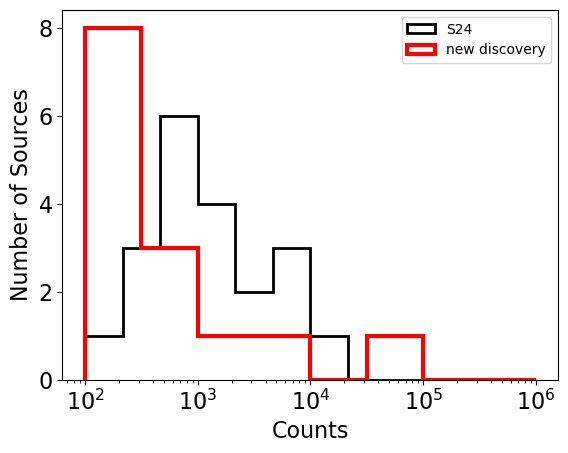

In [3]:
file_path = '/Users/baotong/data_GalDisc/data/result_GL/pn_allres.xlsx'  # 将此处替换为你的xlsx文件路径
df = pd.read_excel(file_path,sheet_name='cand')
periodlist=df['period']
srcfilelist=df['srcfile']
ctslist=df['cts']
P_Slist=df['P_Slist']
bins1=np.logspace(2,5,10)
bins2=np.logspace(2,6,9)
plt.hist(ctslist[:26],bins=bins1,histtype='step',lw=2,color='k',label='S24')
plt.hist(ctslist[26:],bins=bins2,histtype='step',lw=3,color='r',label='new discovery')
plt.semilogx()
plt.legend()
plt.xlabel('Counts',fontsize=16)
plt.ylabel('Number of Sources',fontsize=16)
plt.tick_params(labelsize=16)
# plt.semilogy()
plt.show()

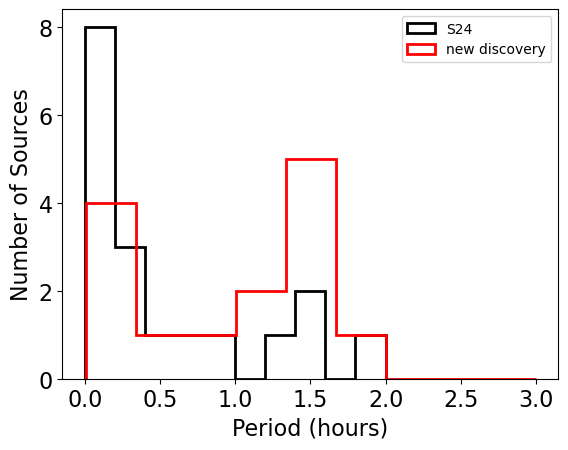

In [11]:
bins1=np.linspace(0.001,2,11)
bins2=np.linspace(0.01,3,10)
plt.hist(periodlist[:26]/3600.,bins=bins1,histtype='step',color='k',lw=2,label='S24')
plt.hist(periodlist[26:]/3600.,bins=bins2,histtype='step',color='r',lw=2,label='new discovery')
# plt.semilogx()
plt.legend(loc='upper right')
plt.xlabel('Period (hours)',fontsize=16)
plt.ylabel('Number of Sources',fontsize=16)
plt.tick_params(labelsize=16)
# plt.semilogy()
plt.show()

In [1]:
def get_source_files(data_folder):
    src_files = []
    epoch_files = []
    for root, _, files in os.walk(data_folder):
        for file in files:
            # 查找 pnevt 文件
            if file.startswith("pnevt") and file.endswith(".csv"):
                src_files.append(os.path.join(root, file))
                # 生成对应的 epoch 文件名
                epoch_file = file.replace("pnevt", "epoch_pn")
                epoch_path = os.path.join(root, epoch_file)
                # 检查对应的 epoch 文件是否存在
                if epoch_file in files:
                    epoch_files.append(epoch_path)
    return src_files, epoch_files

In [15]:
data_folder='/data/tong/xmm/srcevt/csv_all_obs/'
src_files, epoch_files=get_source_files(data_folder)

In [14]:
import pandas as pd
path = '/Users/baotong/data_GalDisc/data/'
a=pd.read_excel(path+'match_e_xmm/e_xmmdr14s_match_all.xls')

In [28]:
csv_file = path+'match_e_xmm/e_xmmdr14s_match_all.csv'  # 你的 CSV 文件路径
df = pd.read_csv(csv_file)
# 保存为 Excel 文件
excel_file = path+'match_e_xmm/e_xmmdr14s_match_all_make.xlsx'  # 保存的 Excel 文件路径
df.to_excel(excel_file, index=False, engine='openpyxl')
print(f'CSV 文件已成功转换为 {excel_file}')

CSV 文件已成功转换为 /Users/baotong/data_GalDisc/data/match_e_xmm/e_xmmdr14s_match_all_make.xlsx


In [31]:
import pandas as pd

def create_ds9_region_file(input_excel, output_region_file):
    # 读取 Excel 文件
    df = pd.read_excel(input_excel)

    # 打开输出的 DS9 region 文件
    with open(output_region_file, 'w') as f:
        # 写入 DS9 region 文件头
        f.write("# Region file format: DS9\n")
        f.write("# global color=white font='helvetica 10' select=1 width=1\n")
        f.write("fk5\n")
        # 遍历数据框中的每一行，创建对应的 circle 和 text
        for _, row in df.iterrows():
            ra = row['ra']       # RA 列
            dec = row['dec']     # DEC 列
            inSlist = row['inSlist']  # inSlist 列

            # 创建 region 文件中的 circle 行
            # DS9 的 RA 和 DEC 是以度为单位的，需要注意坐标格式
            region_line = f"circle({ra},{dec},0.0138888) # text={{{inSlist}}}\n"
            f.write(region_line)

    print(f"DS9 region file '{output_region_file}' has been created.")

# 示例使用
path='/Users/baotong/data_GalDisc/data/result_GL/'
input_excel = path+ 'pn_allres.xlsx'  # 替换为你的 Excel 文件路径
output_region_file = path+'pn_allres.reg'  # 输出的 region 文件路径

create_ds9_region_file(input_excel, output_region_file)


DS9 region file '/Users/baotong/data_GalDisc/data/result_GL/pn_allres.reg' has been created.
